In [1]:
#NESTE NOTEBOOK PUCHEI O MEU DATASET SEM DADOS NULOS. JA TRABALHADA UM POUCO.

In [2]:
import pandas as pd

In [3]:
# df = pd.read_excel(open('/content/drive/MyDrive/Monografia/Monografia 01/Parte Tecnica/Parte 1/Prestacoes_29.10.2022_18Categorias.xlsx', 'rb'),sheet_name='Sheet1')
df = pd.read_excel(open('Prestacoes_29.10.2022_18Categorias.xlsx', 'rb'),sheet_name='Sheet1')

In [4]:
df.isna().sum()

NUMEROCLIENTE                    0
CODIGOCLIENTE                    0
NR_PRESTACOES                    0
NR_PREST_PAGAS_ATRASO            0
NR_PREST_PAGAS_SEM_ATRASO        0
NR_PREST_NAOPAGAS_ATRASO         0
NR_PREST_NAO_PAGAS_SEM_ATRASO    0
TIPOCREDITO                      0
DATACRIACAOCREDITO               0
PRAZO                            0
CAPACIDADEENDIVIDAMENTO          0
VALORCREDITO                     0
VALORPRESTACAO                   0
PAIS                             0
PROVINCIA                        0
IDADE                            0
DATACRIACAO                      0
PROFISSAO                        0
CARGO                            0
CATEGORIAPROFISSIONAL            0
TIPOCLIENTE                      0
RENDAMENSAL                      0
RENDAANUAL                       0
ESTADOCIVIL                      0
HABILITACOES                     0
EstadoCliente                    0
SEXO                             0
DT_REGISTO_CLIENTE               0
dtype: int64

In [5]:
df.head()

,NUMEROCLIENTE,CODIGOCLIENTE,NR_PRESTACOES,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO,DATACRIACAOCREDITO,PRAZO,...,CARGO,CATEGORIAPROFISSIONAL,TIPOCLIENTE,RENDAMENSAL,RENDAANUAL,ESTADOCIVIL,HABILITACOES,EstadoCliente,SEXO,DT_REGISTO_CLIENTE
0,10102010,1,36,0,36,0,0,CU,2012-08-09,36,...,PROGRAMADOR,TECNICO SUPERIOR,S,23000.0,276000.0,S,6,1,1,2012-07-20 13:44:29.220
1,10102020,1,5,2,3,0,0,CJ,2015-06-16,5,...,PROGRAMADOR,TECNICO SUPERIOR,S,23000.0,276000.0,S,6,0,1,2012-07-20 13:44:29.220
2,10102040,1,1,0,1,0,0,CJ,2015-11-12,1,...,PROGRAMADOR,TECNICO SUPERIOR,S,23000.0,276000.0,S,6,1,1,2012-07-20 13:44:29.220
3,10102050,1,3,0,3,0,0,CJ,2016-04-19,3,...,PROGRAMADOR,TECNICO SUPERIOR,S,23000.0,276000.0,S,6,1,1,2012-07-20 13:44:29.220
4,10102060,1,1,1,0,0,0,CJ,2017-12-13,1,...,PROGRAMADOR,TECNICO SUPERIOR,S,23000.0,276000.0,S,6,0,1,2012-07-20 13:44:29.220


In [6]:
#AQUI ESTOU A ADICIONAR OS DADOS DE GRADUACAO RELACIONADOS COM A COLUNA DE HABILITACOES:
df['GRADUADO']='0';
df['GRADUADO'][df.HABILITACOES==5]='1';
df['GRADUADO'][df.HABILITACOES==6]='1';
df['GRADUADO'][df.HABILITACOES==7]='1';
df['GRADUADO'][df.HABILITACOES==10]='1';

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NUMEROCLIENTE                  9487 non-null   int64         
 1   CODIGOCLIENTE                  9487 non-null   int64         
 2   NR_PRESTACOES                  9487 non-null   int64         
 3   NR_PREST_PAGAS_ATRASO          9487 non-null   int64         
 4   NR_PREST_PAGAS_SEM_ATRASO      9487 non-null   int64         
 5   NR_PREST_NAOPAGAS_ATRASO       9487 non-null   int64         
 6   NR_PREST_NAO_PAGAS_SEM_ATRASO  9487 non-null   int64         
 7   TIPOCREDITO                    9487 non-null   object        
 8   DATACRIACAOCREDITO             9487 non-null   datetime64[ns]
 9   PRAZO                          9487 non-null   int64         
 10  CAPACIDADEENDIVIDAMENTO        9487 non-null   int64         
 11  VALORCREDITO     

In [8]:
lista_colunas=df.dtypes.index
lista_categoria_colunas=df.dtypes.values
lista_numericos=[]
lista_categoricos=[]
for i in range(len(lista_categoria_colunas)):
    if lista_categoria_colunas[i]=='object':
        lista_categoricos.append(lista_colunas[i])

def convert_dtypes(df,lista_categoricos):
    for i in lista_categoricos:
        df[i]=df[i].astype('category')
convert_dtypes(df,lista_categoricos)
df['CAPACIDADEENDIVIDAMENTO']=df['CAPACIDADEENDIVIDAMENTO'].astype('category')
df['GRADUADO']=df['GRADUADO'].astype('category')
df.drop(columns=['CARGO'],inplace=True)
df.drop(columns=['DATACRIACAO'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   NUMEROCLIENTE                  9487 non-null   int64         
 1   CODIGOCLIENTE                  9487 non-null   int64         
 2   NR_PRESTACOES                  9487 non-null   int64         
 3   NR_PREST_PAGAS_ATRASO          9487 non-null   int64         
 4   NR_PREST_PAGAS_SEM_ATRASO      9487 non-null   int64         
 5   NR_PREST_NAOPAGAS_ATRASO       9487 non-null   int64         
 6   NR_PREST_NAO_PAGAS_SEM_ATRASO  9487 non-null   int64         
 7   TIPOCREDITO                    9487 non-null   category      
 8   DATACRIACAOCREDITO             9487 non-null   datetime64[ns]
 9   PRAZO                          9487 non-null   int64         
 10  CAPACIDADEENDIVIDAMENTO        9487 non-null   category      
 11  VALORCREDITO     

In [10]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 738 kB/s 


In [11]:
#EFECTUANDO ORDENACAO POR DATA DE CRIACAO DE CREDITO PARA EFEITOS DE SEPARACAO ENTRE 
#DADOS DE TESTES E DE VALIDACAO
dc = df.sort_values('DATACRIACAOCREDITO',ignore_index=True)
df_train = dc[dc.index < 6000]
df_val = dc[dc.index > 6000]
df_val.sort_values('DATACRIACAOCREDITO',inplace=True,ignore_index=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
dc = dc[['NUMEROCLIENTE',
 'CODIGOCLIENTE',
 'NR_PRESTACOES',
 'NR_PREST_PAGAS_ATRASO',
 'NR_PREST_PAGAS_SEM_ATRASO',
 'NR_PREST_NAOPAGAS_ATRASO',
 'NR_PREST_NAO_PAGAS_SEM_ATRASO',
 'TIPOCREDITO',
 'DATACRIACAOCREDITO',
 'PRAZO',
 'CAPACIDADEENDIVIDAMENTO',
 'VALORCREDITO',
 'VALORPRESTACAO',
 'PAIS',
 'PROVINCIA',
 'IDADE',
 'PROFISSAO',
 'CATEGORIAPROFISSIONAL',
 'TIPOCLIENTE',
 'RENDAMENSAL',
 'RENDAANUAL',
 'ESTADOCIVIL',
 'HABILITACOES',
 'SEXO',
 'DT_REGISTO_CLIENTE',
 'GRADUADO',
 'EstadoCliente']]

In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns

In [15]:
XX = dc.corr()

In [16]:
# plt.figure(figsize=(16,6))
# sns.heatmap(data=XX, annot=True)
# %matplotlib (line = "inline");

# OneHotEncoding

In [17]:
from category_encoders.one_hot import OneHotEncoder
enc = OneHotEncoder(cols=['TIPOCREDITO','CAPACIDADEENDIVIDAMENTO','PAIS','PROVINCIA','CATEGORIAPROFISSIONAL','TIPOCLIENTE','ESTADOCIVIL','SEXO','GRADUADO'])
enc.fit(df_train)

df_train_ohe = enc.transform(df_train)
df_val_ohe = enc.transform(df_val)

df_train_ohe = enc.transform(df_train)
df_val_ohe = enc.transform(df_val)

In [18]:
X_train = df_train_ohe.drop(['DT_REGISTO_CLIENTE','EstadoCliente','DATACRIACAOCREDITO'], axis=1)
X_val = df_val_ohe.drop(['DT_REGISTO_CLIENTE','EstadoCliente','DATACRIACAOCREDITO'], axis=1)

y_train = df_train_ohe['EstadoCliente'] # Variavel Independente
y_val = df_val_ohe['EstadoCliente'] # Variavel Independente

## Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
mdl = RandomForestRegressor(n_jobs=6, n_estimators=100, random_state=22)
mdl.fit(X_train, y_train)

p_ohe = mdl.predict(X_val)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, p_ohe)


0.01068273092369478

## Xgboost

In [20]:
from xgboost import XGBClassifier

In [21]:
clf = XGBClassifier(n_estimators=1000,learning_rate=0.01)

In [22]:
# clf.fit(X_train, y_train)
# accuracy = clf.score()

# p_ohe_xgb = clf.predict(X_val)
# mean_absolute_error(y_val, p_ohe_xgb)

## Logistc Regretion WITH ONE HOT ENCODER

In [23]:
dc_r0 = dc
ordl = OneHotEncoder(cols=['TIPOCREDITO','CAPACIDADEENDIVIDAMENTO','PAIS','PROVINCIA','CATEGORIAPROFISSIONAL','TIPOCLIENTE','ESTADOCIVIL','SEXO','GRADUADO'])
ordl.fit(dc_r0)

Log = ordl.transform(dc_r0)

In [24]:
Log.drop(['CODIGOCLIENTE','NUMEROCLIENTE','DATACRIACAOCREDITO','DT_REGISTO_CLIENTE'],inplace=True,axis=1)

In [25]:
Log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NR_PRESTACOES                  9487 non-null   int64  
 1   NR_PREST_PAGAS_ATRASO          9487 non-null   int64  
 2   NR_PREST_PAGAS_SEM_ATRASO      9487 non-null   int64  
 3   NR_PREST_NAOPAGAS_ATRASO       9487 non-null   int64  
 4   NR_PREST_NAO_PAGAS_SEM_ATRASO  9487 non-null   int64  
 5   TIPOCREDITO_1                  9487 non-null   int64  
 6   TIPOCREDITO_2                  9487 non-null   int64  
 7   PRAZO                          9487 non-null   int64  
 8   CAPACIDADEENDIVIDAMENTO_1      9487 non-null   int64  
 9   CAPACIDADEENDIVIDAMENTO_2      9487 non-null   int64  
 10  VALORCREDITO                   9487 non-null   float64
 11  VALORPRESTACAO                 9487 non-null   float64
 12  PAIS_1                         9487 non-null   i

In [26]:
m = Log.iloc[0:9487,0:59].values
n = Log.iloc[0:9487,59:60].values

In [27]:
#Log.drop(columns=['DT_REGISTO_CLIENTE','DATACRIACAOCREDITO'],inplace=True,axis=1)

In [28]:
from sklearn.model_selection import train_test_split
M_train,M_test,n_train,n_test = train_test_split(m,n, test_size=0.3,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
scc = StandardScaler()
M_train = scc.fit_transform(M_train)
M_test = scc.transform(M_test)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(M_train,n_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
n_pread = model.predict(M_test)

In [32]:
accuracy_score(n_test,n_pread)*100

99.57850368809274

In [33]:
Log.iloc[100:101,0:60]

,NR_PRESTACOES,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO_1,TIPOCREDITO_2,PRAZO,CAPACIDADEENDIVIDAMENTO_1,CAPACIDADEENDIVIDAMENTO_2,...,ESTADOCIVIL_4,ESTADOCIVIL_5,ESTADOCIVIL_6,HABILITACOES,SEXO_1,SEXO_2,SEXO_3,GRADUADO_1,GRADUADO_2,EstadoCliente
100,1,0,1,0,0,0,1,1,0,1,...,0,0,0,3,1,0,0,0,1,1


In [34]:
model.predict(scc.transform(Log.iloc[100:101,0:59])) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1])

In [35]:
XX = dc['CAPACIDADEENDIVIDAMENTO']

# ORDINAL ENCODING

In [36]:
from category_encoders.ordinal import OrdinalEncoder
ent = OrdinalEncoder(cols=['TIPOCREDITO','CAPACIDADEENDIVIDAMENTO','PAIS','PROVINCIA','CATEGORIAPROFISSIONAL','TIPOCLIENTE','ESTADOCIVIL','SEXO','GRADUADO'])
ent.fit(df_train)
df_train_ord = ent.transform(df_train)
df_val_ord = ent.transform(df_val)

X_train_ord = df_train_ord.drop(['DT_REGISTO_CLIENTE','DATACRIACAOCREDITO','EstadoCliente','NUMEROCLIENTE'], axis=1)
X_val_ord = df_val_ord.drop(['DT_REGISTO_CLIENTE','DATACRIACAOCREDITO','EstadoCliente','NUMEROCLIENTE'], axis=1)

y_train_ord = df_train_ohe['EstadoCliente'] # Variavel Independente
y_val_ord = df_val_ohe['EstadoCliente'] # Variavel Independente

In [37]:
mdl = RandomForestRegressor(n_jobs=6, n_estimators=1000, random_state=22)
mdl.fit(X_train_ord, y_train_ord)

p_ord = mdl.predict(X_val_ord)
mean_absolute_error(y_val_ord, p_ord)

0.01045639701663798

## Logistic Regretion with OrdinalEncoder

In [38]:
dc_r = dc
rl = OrdinalEncoder(cols=['TIPOCREDITO','CAPACIDADEENDIVIDAMENTO','PAIS','PROVINCIA','CATEGORIAPROFISSIONAL','TIPOCLIENTE','ESTADOCIVIL','SEXO','GRADUADO'])
rl.fit(dc_r)

df_train_rl = ent.transform(dc_r)

In [39]:
df_train_rl.iloc[0:1,]

,NUMEROCLIENTE,CODIGOCLIENTE,NR_PRESTACOES,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO,DATACRIACAOCREDITO,PRAZO,...,CATEGORIAPROFISSIONAL,TIPOCLIENTE,RENDAMENSAL,RENDAANUAL,ESTADOCIVIL,HABILITACOES,SEXO,DT_REGISTO_CLIENTE,GRADUADO,EstadoCliente
0,10102010,1,36,0,36,0,0,1,2012-08-09,36,...,1,1,23000.0,276000.0,1,6,1,2012-07-20 13:44:29.220,1,1


In [40]:
df_train_rl.drop(['DATACRIACAOCREDITO','DT_REGISTO_CLIENTE',],inplace=True,axis=1)
df_train_rl.drop(['CODIGOCLIENTE','NUMEROCLIENTE',],inplace=True,axis=1)

In [41]:
cols = list(df.columns.values)

In [42]:
df_train_rl.iloc[0:9,0:22]

,NR_PRESTACOES,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO,PRAZO,CAPACIDADEENDIVIDAMENTO,VALORCREDITO,VALORPRESTACAO,...,IDADE,PROFISSAO,CATEGORIAPROFISSIONAL,TIPOCLIENTE,RENDAMENSAL,RENDAANUAL,ESTADOCIVIL,HABILITACOES,SEXO,GRADUADO
0,36,0,36,0,0,1,36,1,200000.0,7535.01,...,25,31,1,1,23000.00,276000.00,1,6,1,1
1,37,10,27,0,0,1,36,1,60000.0,2322.58,...,33,54,2,1,6451.96,77423.52,2,5,1,1
2,36,26,10,0,0,1,36,2,70000.0,2709.68,...,28,13,3,1,10034.00,120408.00,1,5,2,1
3,37,0,37,0,0,1,36,2,140000.0,5274.51,...,38,52,3,1,1615050.00,19380600.00,2,6,1,1
4,36,17,19,0,0,1,36,2,50000.0,1935.49,...,34,50,4,1,10000.00,120000.00,1,3,1,2
5,37,0,37,0,0,1,36,1,350000.0,13548.40,...,34,53,3,1,39941.00,479292.00,2,3,1,2
6,6,1,5,0,0,1,6,2,10000.0,1780.24,...,41,46,4,1,15000.00,180000.00,3,8,1,2
7,11,7,4,0,0,1,12,2,90000.0,8466.87,...,39,32,5,1,102000.00,1224000.00,1,6,1,1
8,36,1,35,0,0,1,36,2,500000.0,18837.53,...,36,52,5,1,68931.00,827172.00,2,7,1,1


In [43]:
x = df_train_rl.iloc[0:9487,0:22].values
y = df_train_rl.iloc[0:9487,22:23].values

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=101)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
ypread = model.predict(X_test)

In [48]:
accuracy_score(y_test,ypread)

0.9931506849315068

In [49]:
confusion_matrix(y_test,ypread)

array([[ 827,   10],
       [   3, 1058]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


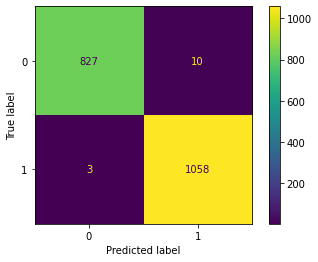

In [50]:
plot_confusion_matrix(model,X_test,y_test)

In [51]:
print(classification_report(y_test,ypread))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       837
           1       0.99      1.00      0.99      1061

    accuracy                           0.99      1898
   macro avg       0.99      0.99      0.99      1898
weighted avg       0.99      0.99      0.99      1898



In [52]:
df_train_rl.iloc[2500:2501,1:]

,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO,PRAZO,CAPACIDADEENDIVIDAMENTO,VALORCREDITO,VALORPRESTACAO,PAIS,...,PROFISSAO,CATEGORIAPROFISSIONAL,TIPOCLIENTE,RENDAMENSAL,RENDAANUAL,ESTADOCIVIL,HABILITACOES,SEXO,GRADUADO,EstadoCliente
2500,0,1,0,0,2,1,1,7000.0,7560.0,1,...,60,2,1,8613.09,103357.08,1,3,2,2,1


In [53]:
from sklearn.linear_model import LogisticRegressionCV
model_CV = LogisticRegressionCV()
model_CV.fit(X_train,y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [54]:
model_CV.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [55]:
model_CV.coef_

array([[ 9.19749438e+00, -3.48257608e+01,  3.11178596e+00,
        -9.68306774e+00,  1.88448650e-01,  9.03483874e-01,
         7.10484843e-03,  4.25263457e-02,  1.92090501e-01,
         3.46633603e-01,  6.35592901e-03, -3.73090186e-03,
        -1.79758789e-01, -1.21895278e-01,  5.86048658e-01,
        -1.37844463e-01,  7.59315516e-02,  7.59315516e-02,
         2.32146958e-01, -1.61648180e-01, -2.51444845e-01,
        -4.63285941e-01]])

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [57]:
y_pred = model_CV.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.994204425711275

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


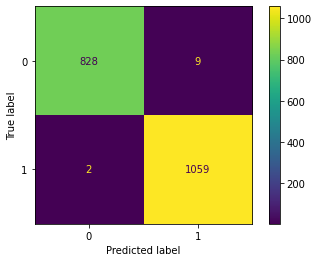

In [59]:
plot_confusion_matrix(model_CV,X_test,y_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       837
           1       0.99      1.00      0.99      1061

    accuracy                           0.99      1898
   macro avg       0.99      0.99      0.99      1898
weighted avg       0.99      0.99      0.99      1898



In [61]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


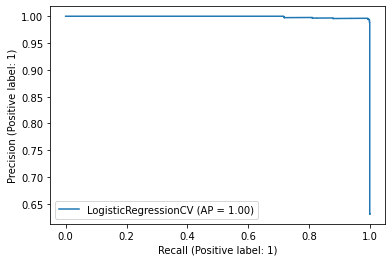

In [62]:
plot_precision_recall_curve(model_CV,X_test,y_test);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


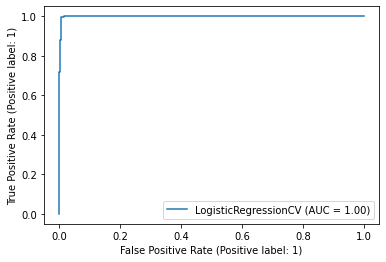

In [63]:
plot_roc_curve(model_CV,X_test,y_test);

# Implementacao

In [64]:
import pickle

In [65]:
pickle.dump(model,open('/content/drive/MyDrive/Monografia/Monografia 01/Parte Tecnica/Parte 1/regmodel.pkl','wb'))

In [66]:
pickled_model = pickle.load(open('/content/drive/MyDrive/Monografia/Monografia 01/Parte Tecnica/Parte 1/regmodel.pkl','rb'))

In [69]:
Log.iloc[9000:9001,0:59]

,NR_PRESTACOES,NR_PREST_PAGAS_ATRASO,NR_PREST_PAGAS_SEM_ATRASO,NR_PREST_NAOPAGAS_ATRASO,NR_PREST_NAO_PAGAS_SEM_ATRASO,TIPOCREDITO_1,TIPOCREDITO_2,PRAZO,CAPACIDADEENDIVIDAMENTO_1,CAPACIDADEENDIVIDAMENTO_2,...,ESTADOCIVIL_3,ESTADOCIVIL_4,ESTADOCIVIL_5,ESTADOCIVIL_6,HABILITACOES,SEXO_1,SEXO_2,SEXO_3,GRADUADO_1,GRADUADO_2
9000,3,2,1,0,0,0,1,3,0,1,...,0,0,0,0,4,0,1,0,0,1


In [67]:
pickled_model.predict(scc.transform(Log.iloc[9000:9001,0:59]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored